In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# load dataset Pima_Indians_Diabetes in scikit-learn
import pandas as pd     # for handle dataset
import numpy as np      # math, numeric operate
import matplotlib.pyplot as plt     # draw, plot   
import seaborn as sns               # draw, plot with color


In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

train_data.tail(30)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S


- Comment: không nên bỏ cột Cabin vì các sample mà có Cabin không NaN thì hầu hết sống sót. 

In [4]:
gender_sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 1. EDA

## 1.1 Non-grapical

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- There are some attributes like 'name, sex, ticket, cabin, embarked' are object (string)
- So, should i rescale them?

In [6]:
# Check for missing value
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- We have 177 'age' and 687 'cabin' is NaN
- So, should i remove 'cabin' columns?

In [7]:
# Set precision to 4 decimal places:
pd.options.display.float_format = '{:.4f}'.format

description = train_data.describe()
description

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


- Tại sao có một số vé có giá bằng 0? Có phải đó là giá vé trẻ em?

## 1.2 Graphical

Class count:  Survived
0    549
1    342
Name: count, dtype: int64


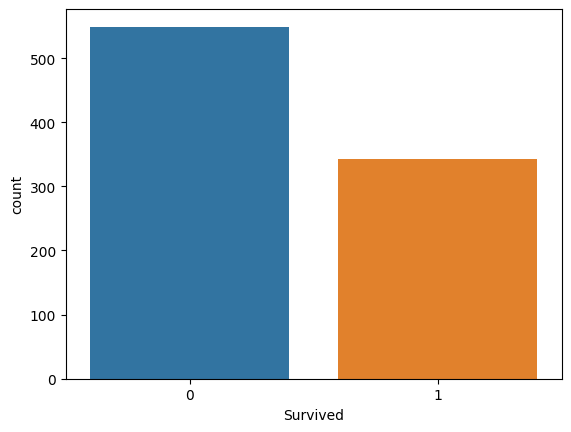

In [8]:
class_count = train_data['Survived'].value_counts()
print("Class count: ", class_count)
sns.countplot(x=train_data['Survived']);

In [9]:
# Correlations:
data_corr = train_data.corr(method='pearson', numeric_only=True)

data_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0000,-0.0050,-0.0351,0.0368,-0.0575,-0.0017,0.0127
Survived,-0.0050,1.0000,-0.3385,-0.0772,-0.0353,0.0816,0.2573
Pclass,-0.0351,-0.3385,1.0000,-0.3692,0.0831,0.0184,-0.5495
Age,0.0368,-0.0772,-0.3692,1.0000,-0.3082,-0.1891,0.0961
SibSp,-0.0575,-0.0353,0.0831,-0.3082,1.0000,0.4148,0.1597
Parch,-0.0017,0.0816,0.0184,-0.1891,0.4148,1.0000,0.2162
Fare,0.0127,0.2573,-0.5495,0.0961,0.1597,0.2162,1.0000


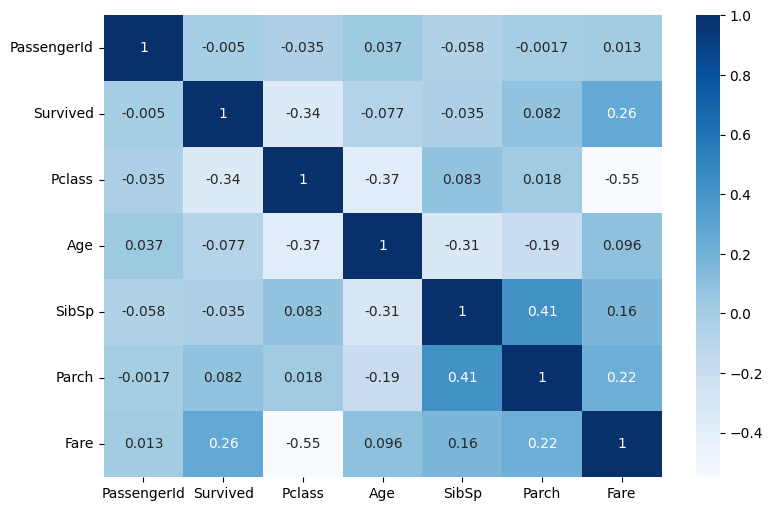

In [10]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_corr, annot=True, cmap='Blues')
plt.show()

- Nhận thấy rằng:
    + 'fare' có tương quan (+) và pclass có tương quan (-) với 'Survived'
      &rarr; Giá vé càng cao hay loại vé càng cao cấp (càng thấp theo Ordical) thì tỉ lệ sống càng cao.
    + 'fare' và 'pclass' có tương quan mạnh ngược, có nghĩa là vé càng cao cấp thì giá càng cao

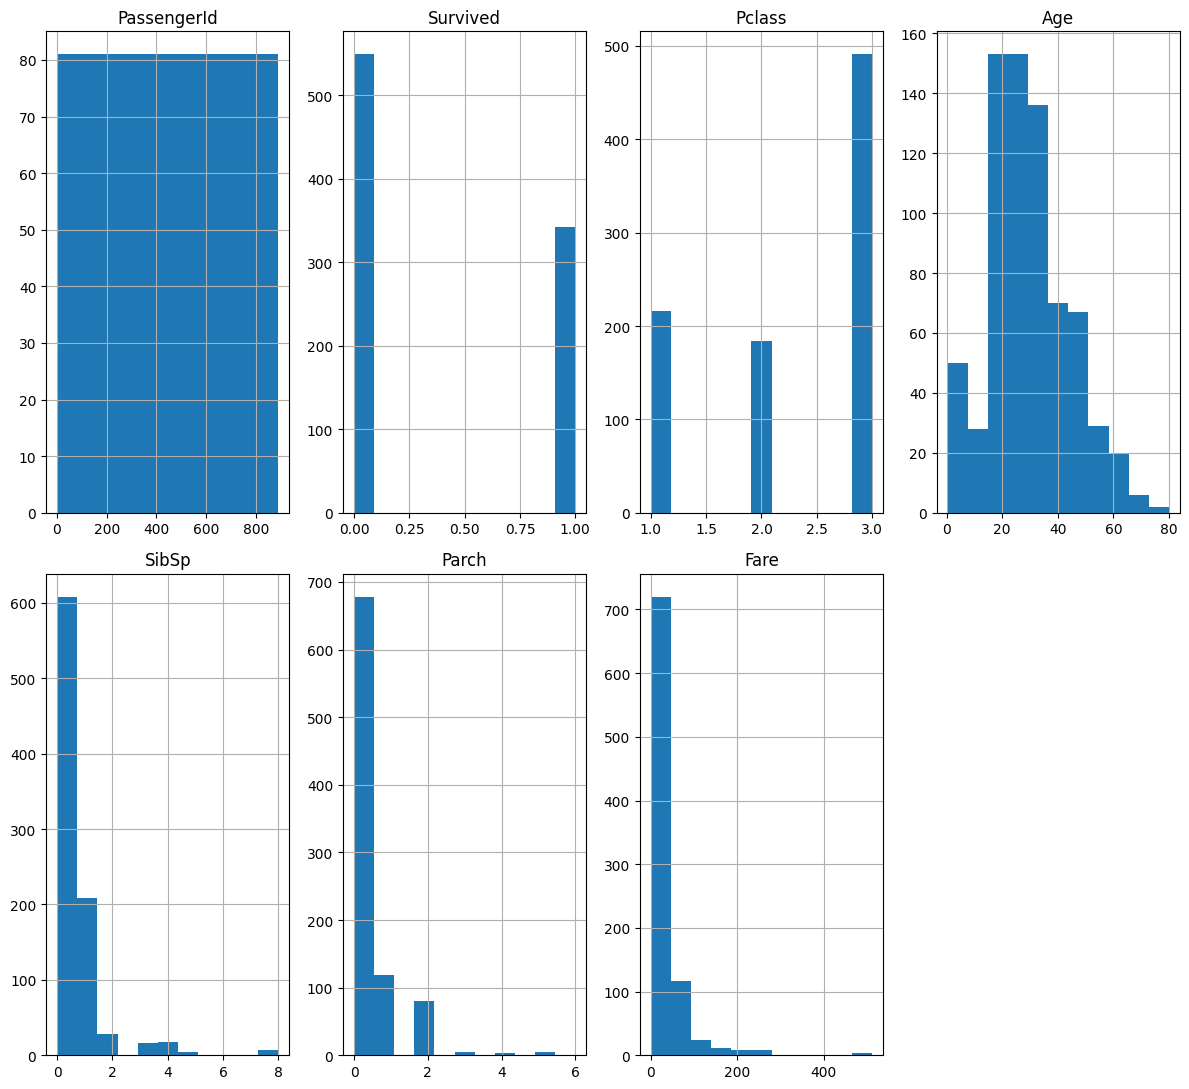

In [11]:
# Distribution with histogram
ax = train_data.hist(figsize=(12, 11), bins=11, layout=(2, 4))
plt.tight_layout()      # auto adjust space between subplots
plt.show()

- Comment: các phân phối hầu hết bị lệch phải (Right-skewed)

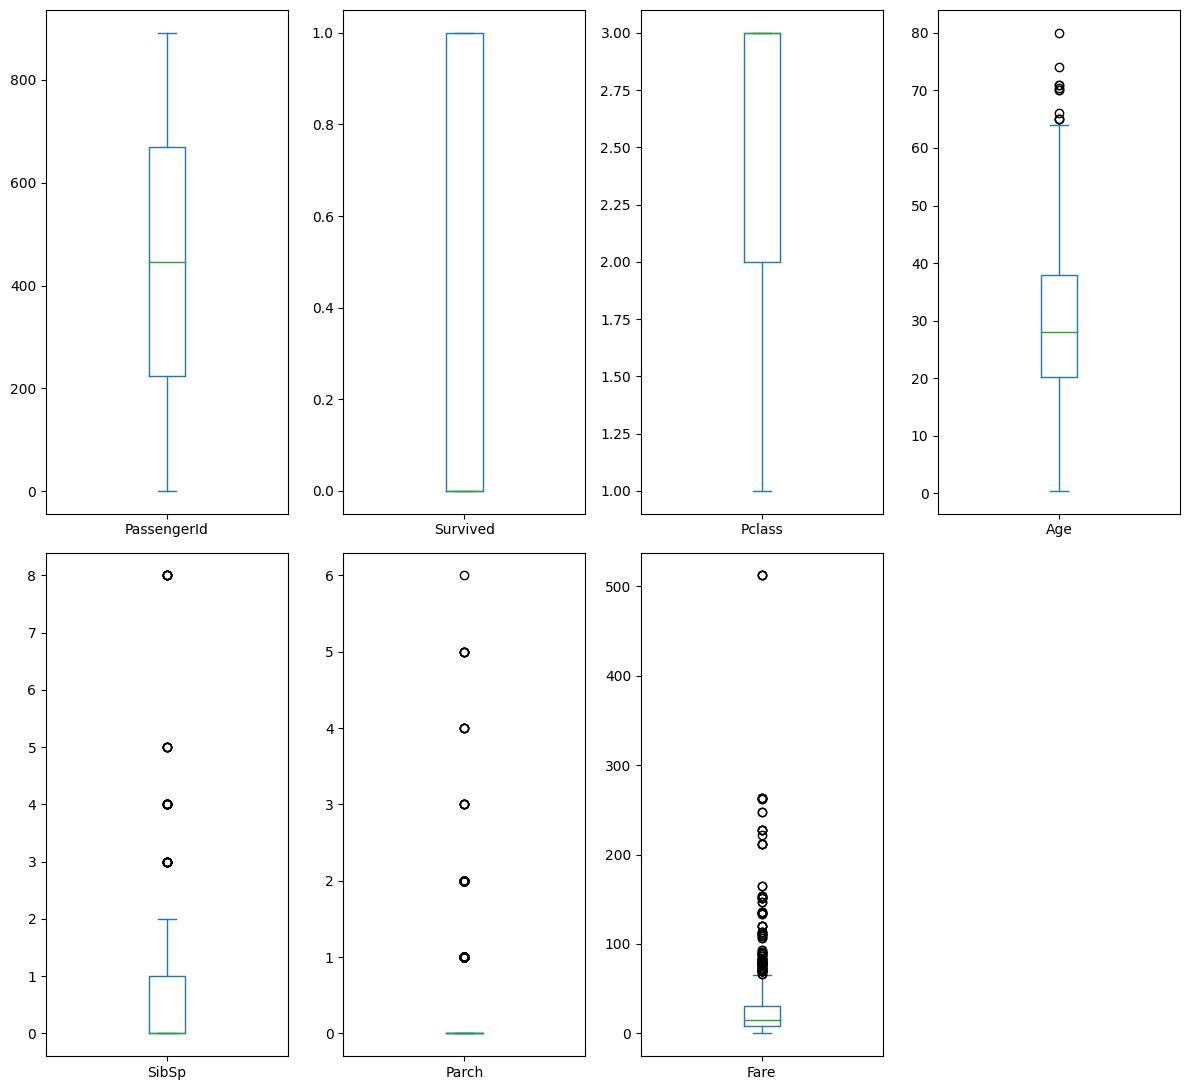

In [12]:
# Boxplot
train_data.plot(kind='box', figsize=(12,11), subplots=True, layout=(2, 4), sharex=False)
# sns.boxplot(data=train_data, orient='h', palette='Set2', width=0.6)
plt.tight_layout()
plt.show()

- Comment:
    + Có khá nhiều outlier ở 'fare', các giá trị phân phối không đều. 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Figure size 2000x1200 with 0 Axes>

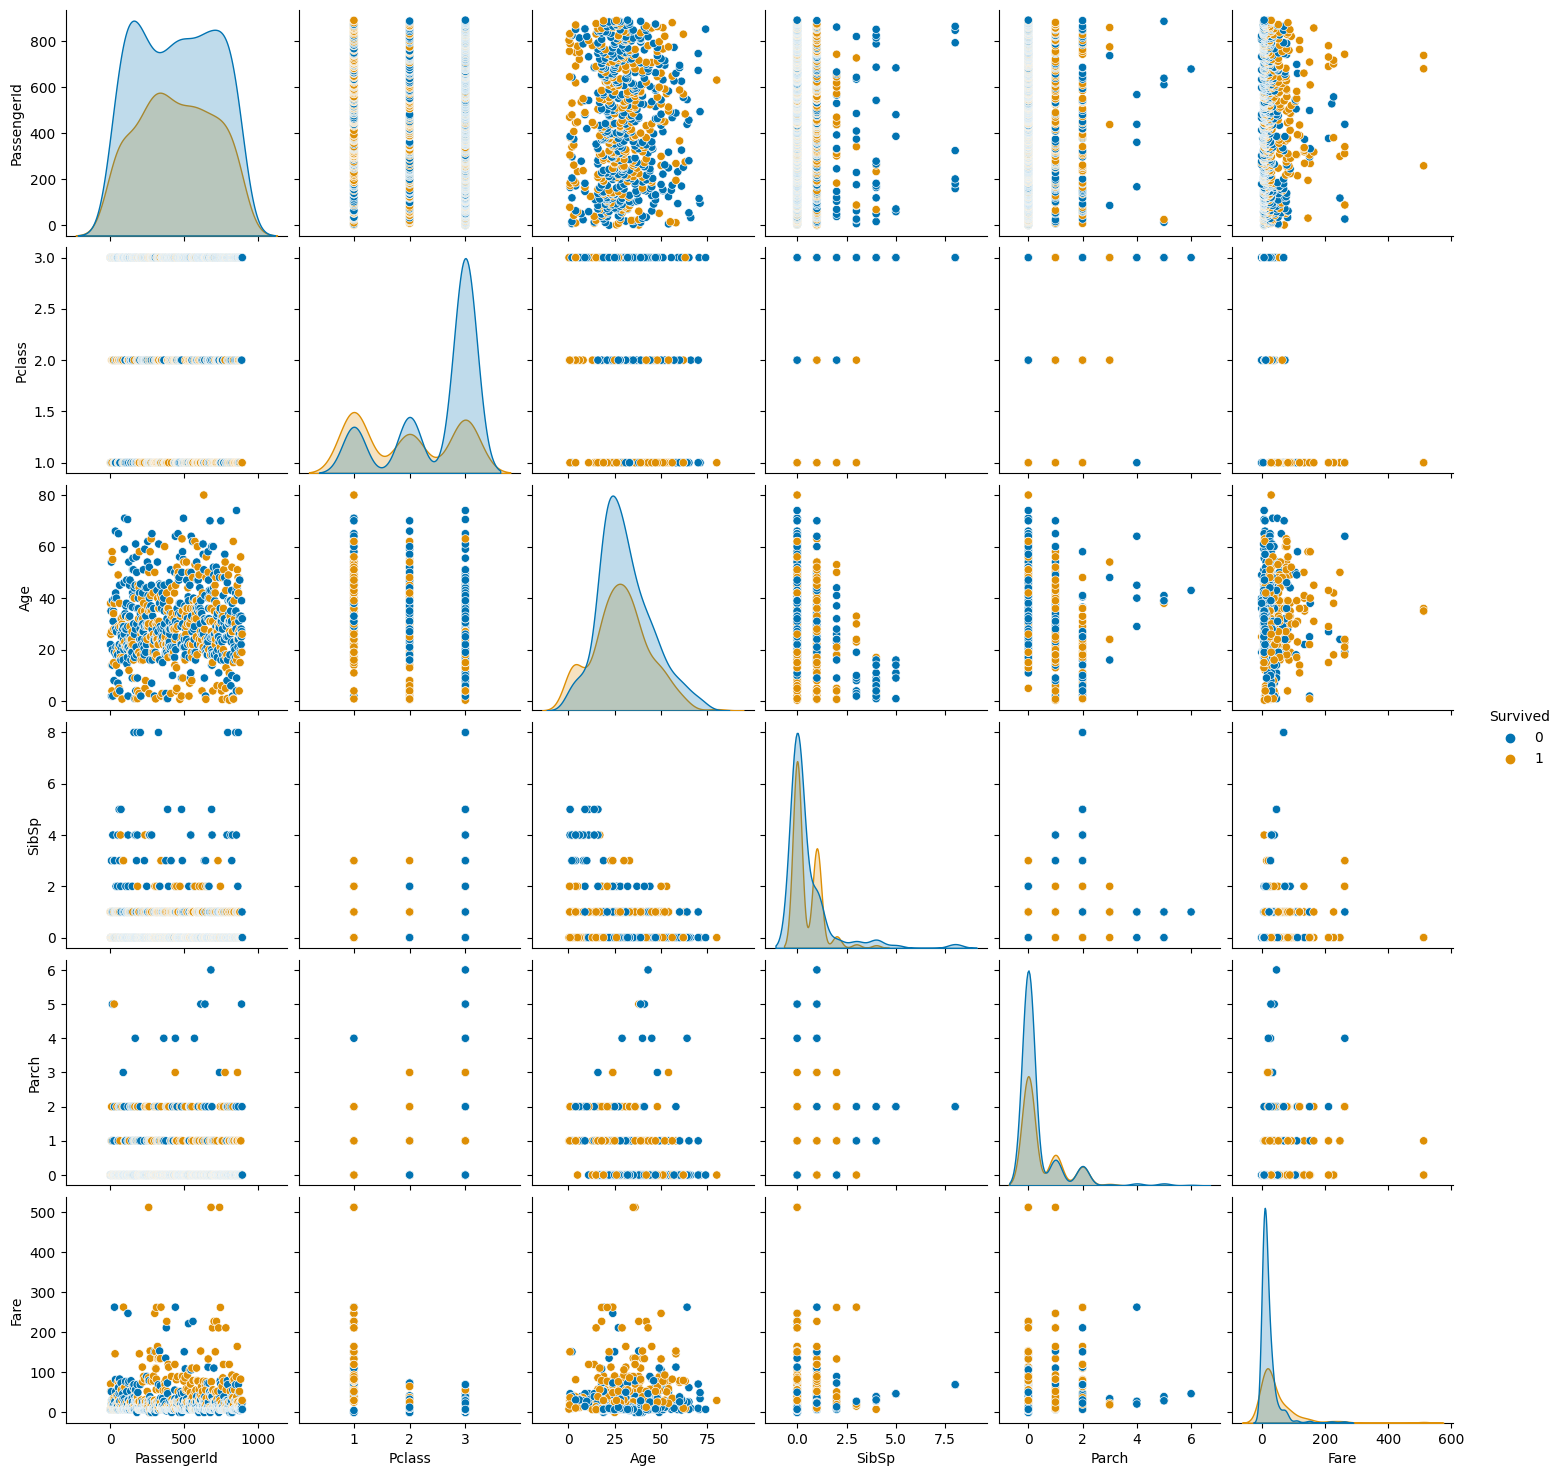

In [13]:
# Scatter matrix plot:
plt.figure(figsize=(20, 12))
sns.pairplot(train_data, hue='Survived', palette='colorblind')
plt.show();

- Tương quan giữa các attributes categorical như 'Sex', 'Embarked'


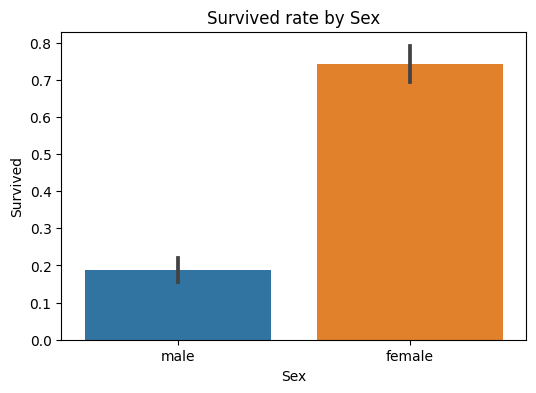

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survived rate by Sex')
plt.show()

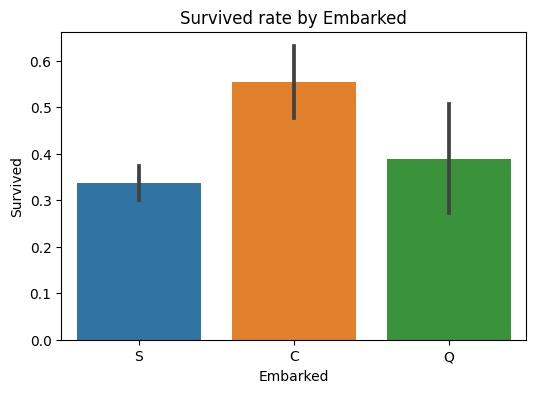

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survived rate by Embarked')
plt.show()

- Comment:
    + 'Sex': female có tỉ lệ sống vượt trội so với male
    + 'Embarked': C(Cherbourg) có tỉ lệ sống >50%, các cảng còn lại đều dưới.

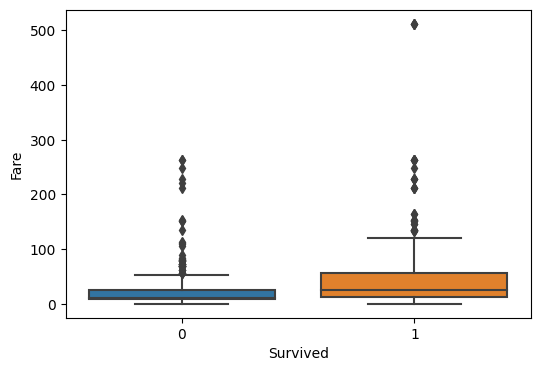

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Survived", y="Fare", data=train_data)
plt.show()

# 2. Data cleaning

## 2.1 Remove duplicated

In [17]:
# Remove duplicated
data_dup = train_data[train_data.duplicated(keep='first')]
print(data_dup)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


- Comment: không có dữ liệu bị trùng lặp
  

## 2.2 Drop 'PassengerId' column

In [18]:
train_data = train_data.drop(columns=["PassengerId"])

print("Dropped 'PasengerId' ")

Dropped 'PasengerId' 


# **K-fold**

--- 
Nhận thấy dataset khá nhỏ, vậy nên ta dùng K-fold CV với k=10. 
Sau đó preprocessing trong fold

K-fold để chia data thành 10 fold (k=10) và tiến hành

- Preprocessing
- Features engineering trong fold

---

In [19]:
from sklearn import model_selection as skl_model_select 
from sklearn import pipeline as skl_pipeline
from sklearn import compose as skl_compose
from sklearn import impute as skl_impute
from sklearn import preprocessing as skl_pre
from sklearn import linear_model as skl_linmodel
from sklearn import ensemble as skl_ensemble
from sklearn import feature_selection as skl_f_select
import xgboost as xgb
import lightgbm as lgb


In [20]:
# Split data to X,y
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X.head()
# y.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


# 3. Data preprocessing

0. Filling missing values
    - 'Age' column has 177 NaN values
2. Xóa cột 'Cabin' & 'Name'
3. Scale các giá trị categorical (string) như 'Sex', 'Embarked'
4. Construction: 'Ticket'

## Features engineering:

- Add 'Relationship': 'SibSp' + 'Parch'
- Get 'Title' from name like 'Mrs', 'Mr', 'Master',...
- Get 'Deck' from 'Cabin' like 'C', 'B',...

In [21]:
# def extract_title(name):
#             match = re.search(r' ([A-Za-z]+)\.', name)
#             if match:
#                 return match.group(1)
#             return "Unknown"

# print(extract_title('Cumings, Mrs. John Bradley (Florence Briggs Th...'))

# X_tmp = X.copy()
# X_tmp['Title'] = X_tmp['Name'].apply(extract_title)
    
# # Group some rare Title -> 'Rare'
# common_titles = ['Mr', 'Mrs', 'Miss', 'Master']
# X_tmp['Title'] = X_tmp['Title'].apply(lambda t: t if t in common_titles else 'Rare')
# # Remove abundant 'Name' after get the Title
# X_tmp = X_tmp.drop(columns='Name')

# X_tmp['Cabin'] = X_tmp['Cabin'].fillna('Z')
# X_tmp['Deck'] = X_tmp['Cabin'].astype(str).apply(lambda x: x[0] if pd.notna(x) else 'Z')
# # Remove 'Cabin'
# X_tmp = X_tmp.drop(columns=['Cabin'])

# X_tmp.head()

# X_tmp['male_rich'] = ((X_tmp['Sex'] == 'male') & (X_tmp['Fare'] > 50)).astype(int)

# X_tmp.head(20)

In [22]:
from sklearn import base as skl_base
import re # for regex 

class FeatureEngineeringTransformer(skl_base.BaseEstimator, skl_base.TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        ### 1. Relationship: 'SibSp' + 'Parch'
        X['Relationship'] = X['SibSp'] + X['Parch'] + 1

        ### 1.1. IsAlone: Relationship == 0
        X['IsAlone'] = (X['Relationship'] == 1).astype(int)

        ### 2. Get Title from 'Name'
        def extract_title(name):
            match = re.search(r' ([A-Za-z]+)\.', name)
            if match:
                return match.group(1)
            return "Unknown"
        X['Title'] = X['Name'].apply(extract_title)
    
        # Group some rare Title -> 'Rare'
        common_titles = ['Mr', 'Mrs', 'Miss', 'Master']
        X['Title'] = X['Title'].apply(lambda t: t if t in common_titles else 'Rare')
        # X['Title'] = X['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    
        ### Get Deck from 'Cabin' (low cardinality: A-G, T, Z)
        # X['Cabin'] = X['Cabin'].fillna('Z')
        # X['Deck'] = X['Cabin'].astype(str).apply(lambda x: x[0] if pd.notna(x) else 'Z')
        X['Deck'] = X['Cabin'].fillna('Z').str[0]

        ### 3. has_cabin?
        # X["has_cabin"] = np.where(X["Cabin"].notna(), 1, 0)
        # X['Cabin'] = X['Cabin'].fillna('Z')

        ### 4. male_rich: 
        X['male_rich'] = ((X['Sex'] == 'male') & (X['Fare'] > 50)).astype(int)

        ## 5. child_one: with <= 1 parent/sib
        # X['child_one'] = ((X['Title'] == 'Master') & (X['Relationship'] <= 1)).astype(int)
        ## 5. Woman | child
        X['Woman_child'] = ((X['Sex'] == 'female') | (X['Title'] == 'Master')).astype(int)

        ### 6. Encode Embarked: S-0, C-1, Q-2
        embarked_map = {'S': 0, 'C': 1, 'Q': 2}
        X['Embarked'] = X['Embarked'].map(embarked_map)

        # 7. Fare bins
        # X['Fare'] = X['Fare'].fillna(X['Fare'].median())
        # X['Fare_bins'] = pd.cut(
        #     X['Fare'],
        #     bins=[-1, 8, 15, 30, 50, 9999],
        #     labels=[0, 1, 2, 3, 4]
        # ).astype(int)

        # 8. Age bins
        # X['Age'] = X['Age'].fillna(X['Age'].median())
        # X['Age_bins'] = pd.cut(
        #     X['Age'],
        #     bins=[-1, 18, 32, 64, 9999],
        #     labels=[0, 1, 2, 3]
        # ).astype(int)

        # 9. Ticket count:
        X['Ticket_freq'] = X.groupby('Ticket')['Ticket'].transform('count')

        # 10. Fare per person
        X['Fare_per_person'] = X['Fare'] / X['Ticket_freq']


        # Drop all redundant columns:
        # X = X.drop(columns=['SibSp', 'Parch', 'Cabin', 'Name', 'Fare', 'Age'])
        # X = X.drop(columns=['SibSp', 'Parch', 'Name', 'Fare', 'Age'])
        X = X.drop(columns=['SibSp', 'Parch', 'Name', 'Cabin', 'Ticket'])

        
        return X

In [23]:
feature_engineering = FeatureEngineeringTransformer()

In [24]:
# numeric_features = ["Age", "Fare", "relationship"]
# categorical_features = ["Sex", "Embarked", "Pclass", "Cabin"]

# Updata columns after feature_engineering

# numeric_features = ["Age", "Fare", "Relationship", "male_rich", "child_one", "has_cabin"]
# numeric_features = ["Age", "Fare", "Relationship"]
# numeric_features = ["Relationship", "Embarked", "Pclass", "Age_bins", "Fare_bins", "IsAlone", "male_rich"]
numeric_features = ["Relationship", "Pclass", "Age", "Fare", "IsAlone", "male_rich", "Woman_child", "Ticket_freq", "Fare_per_person"]

# categorical_features = ["Sex", "Embarked", "Pclass", "Title", "Deck"]
# categorical_features = ["Sex", "Embarked", "Pclass", "Title", "Cabin", "male_rich", "child_one", "Age_bins", "Fare_bins"]
categorical_features = ["Sex", "Embarked", "Title", "Deck"]


In [25]:
numeric_transformer = skl_pipeline.Pipeline([
    ('impute', skl_impute.SimpleImputer(strategy='median'))
])

categorical_transformer = skl_pipeline.Pipeline([
    ("imputer",  skl_impute.SimpleImputer(strategy="most_frequent")),
    ('encoder', skl_pre.OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])


preprocessor = skl_compose.ColumnTransformer([
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])


In [26]:
# pipeline (tổng quát)
pipeline = skl_pipeline.Pipeline([
    ('feature_engineering', feature_engineering),  
    ('preprocess', preprocessor),
    # SelectKBest with ANOVA, to select k=10 best features
    ('selector', skl_f_select.SelectKBest(skl_f_select.f_classif, k=10)),  # k=10
    ('model', skl_linmodel.LogisticRegression(max_iter=1000))
])

## Check the data after 'feature_engineering' & 'preprocess'

- Show the data

In [27]:
# Show data (X) after feature_engineering & preprocessing
X_original = X.copy()

# After Feature Engineering
X_after_feature = pipeline.named_steps['feature_engineering'].transform(X_original)
print("=== Sau bước feature_engineering ===")
print(X_after_feature.head())
print(X_after_feature.columns)

# After Preprocess (OrdinalEncoder + Imputer)
X_after_preprocess = pipeline.named_steps['preprocess'].fit_transform(X_after_feature)
print("\n=== Sau bước preprocess ===")
# print(X_after_preprocess[:5])   # numpy
feature_names = (
    pipeline.named_steps['preprocess']
    .get_feature_names_out()
)
X_after_preprocess_df = pd.DataFrame(
    X_after_preprocess,
    columns=feature_names
)

X_after_preprocess_df.head(10)

=== Sau bước feature_engineering ===
   Pclass     Sex     Age    Fare  Embarked  Relationship  IsAlone Title Deck  \
0       3    male 22.0000  7.2500    0.0000             2        0    Mr    Z   
1       1  female 38.0000 71.2833    1.0000             2        0   Mrs    C   
2       3  female 26.0000  7.9250    0.0000             1        1  Miss    Z   
3       1  female 35.0000 53.1000    0.0000             2        0   Mrs    C   
4       3    male 35.0000  8.0500    0.0000             1        1    Mr    Z   

   male_rich  Woman_child  Ticket_freq  Fare_per_person  
0          0            0            1           7.2500  
1          0            1            1          71.2833  
2          0            1            1           7.9250  
3          0            1            2          26.5500  
4          0            0            1           8.0500  
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Relationship', 'IsAlone',
       'Title', 'Deck', 'male_rich', 'Woman_child'

,numeric__Relationship,numeric__Pclass,numeric__Age,numeric__Fare,numeric__IsAlone,numeric__male_rich,numeric__Woman_child,numeric__Ticket_freq,numeric__Fare_per_person,categorical__Sex,categorical__Embarked,categorical__Title,categorical__Deck
0,2.0000,3.0000,22.0000,7.2500,0.0000,0.0000,0.0000,1.0000,7.2500,1.0000,0.0000,2.0000,8.0000
1,2.0000,1.0000,38.0000,71.2833,0.0000,0.0000,1.0000,1.0000,71.2833,0.0000,1.0000,3.0000,2.0000
2,1.0000,3.0000,26.0000,7.9250,1.0000,0.0000,1.0000,1.0000,7.9250,0.0000,0.0000,1.0000,8.0000
3,2.0000,1.0000,35.0000,53.1000,0.0000,0.0000,1.0000,2.0000,26.5500,0.0000,0.0000,3.0000,2.0000
4,1.0000,3.0000,35.0000,8.0500,1.0000,0.0000,0.0000,1.0000,8.0500,1.0000,0.0000,2.0000,8.0000
5,1.0000,3.0000,28.0000,8.4583,1.0000,0.0000,0.0000,1.0000,8.4583,1.0000,2.0000,2.0000,8.0000
6,1.0000,1.0000,54.0000,51.8625,1.0000,1.0000,0.0000,1.0000,51.8625,1.0000,0.0000,2.0000,4.0000
7,5.0000,3.0000,2.0000,21.0750,0.0000,0.0000,1.0000,4.0000,5.2687,1.0000,0.0000,0.0000,8.0000
8,3.0000,3.0000,27.0000,11.1333,0.0000,0.0000,1.0000,3.0000,3.7111,0.0000,0.0000,3.0000,8.0000
9,2.0000,2.0000,14.0000,30.0708,0.0000,0.0000,1.0000,2.0000,15.0354,0.0000,1.0000,3.0000,8.0000


- Use REF to select k best features

In [28]:
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier

# mô hình gốc để chọn đặc trưng
# tree_selector = skl_ensemble.RandomForestClassifier(random_state=42)

# #---
# tree_selector = DecisionTreeClassifier(random_state=42)

# # Fit pipeline (no model) to get k best features
# X_transformed = pipeline[:-1].fit_transform(X, y)  # only: feature_engineering + preprocess
# feature_names = (numeric_features + categorical_features)

# # RFE
# rfe = skl_f_select.RFE(estimator=tree_selector, n_features_to_select=5)
# rfe.fit(X_transformed, y)

# # k best features
# selected_features = [f for f, s in zip(feature_names, rfe.support_) if s]
# print("✅ Top features selected:", selected_features)


In [29]:
#====== STOP CODE ======#
# kldj
#====== || ======#

In [30]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [31]:
SEED_RANDOM_FOREST = 21
LOGISTIC_REG_MAX_ITER = 10000

param_grid = [
    # Logistic Regression - NO
    # {
    #     "model": [skl_linmodel.LogisticRegression(max_iter=LOGISTIC_REG_MAX_ITER)],
    #     "model__C": [0.1, 1.0, 10],
    #     "model__solver": ["lbfgs", "liblinear"]
    # },

    # Random Forest
    {
        "model": [skl_ensemble.RandomForestClassifier(random_state=SEED_RANDOM_FOREST)],
        "model__n_estimators": [50, 100, 200, 300, 400, 500],
        "model__max_depth": [1, 3, 5, 7, 9]
        # "model__max_depth": [1] 
    },

    # XGBoost
    {
        "model": [xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')],
        "model__n_estimators": [50, 100, 200, 300, 400, 500],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__max_depth": [1, 3, 5, 7, 9]
        # "model__max_depth": [1]
    },
    
    {
        "model": [svm.SVC(probability=True)],
         "model__C": [0.1, 1, 10],
         "model__kernel": ["linear", "rbf"]
    },
    # KNeighborsClassifier - NO 
    # {
    #     "model": [neighbors.KNeighborsClassifier()],
    #      "model__n_neighbors": [3, 5, 7]
    # 
    
    # DecisionTreeClassifier
    {
        "model": [tree.DecisionTreeClassifier()],
        # "model__max_depth": [3, 5, 7],
        'model__max_depth': [None, 2,4,6,8,10],
        'model__criterion': ['gini', 'entropy'], 
        'model__splitter': ['best', 'random'], 
        'model__min_samples_split': [5,10,15,20,25], 
        'model__max_features': [None, 'auto', 'sqrt', 'log2']
    },
    # LGBMClassifier
    {
        "model": [lgb.LGBMClassifier(random_state=42)],  # Add random_state for reproducibility
        "model__n_estimators": [50, 100, 200, 300],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__max_depth": [3, 5, 7, 9]
    }
    # AdaBoostClassifier - NO 
    # {
    #     "model": [ensemble.AdaBoostClassifier()],
    #     "model__n_estimators": [50, 100, 200, 300, 400]
    # },
    # GradientBoostingClassifier - NO
    # {
    #     "model": [ensemble.GradientBoostingClassifier()],
    #      "model__n_estimators": [50, 100, 200, 300, 400],
    #      "model__learning_rate": [0.05, 0.1]
    # }
]

In [32]:
K_FOLD = 10
SEED_K_FOLD = 21

# Cross validation: K-fold
cv = skl_model_select.StratifiedKFold(n_splits=K_FOLD, shuffle=True, random_state=SEED_K_FOLD)

grid_search = skl_model_select.GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    
    scoring={
        'accuracy': 'accuracy',
        'f1': 'f1',
        'roc_auc': 'roc_auc'
    },
    
    refit='f1', # use 'f1' metric to choose best model

    # Using all CPU 
    n_jobs=-1, # number of threads run in paralell 
    
    # verbose: 0-quite, 1-short, 2-detail
    verbose=2, # print detail log

    error_score='raise'  # stacktrace chi tiết

)


In [ ]:
# Training
grid_search.fit(X, y)

Fitting 10 folds for each of 654 candidates, totalling 6540 fits
[CV] END model=RandomForestClassifier(random_state=21), model__max_depth=1, model__n_estimators=50; total time=   0.3s
[CV] END model=RandomForestClassifier(random_state=21), model__max_depth=1, model__n_estimators=50; total time=   0.3s
[CV] END model=RandomForestClassifier(random_state=21), model__max_depth=1, model__n_estimators=50; total time=   0.3s
[CV] END model=RandomForestClassifier(random_state=21), model__max_depth=1, model__n_estimators=100; total time=   0.4s
[CV] END model=RandomForestClassifier(random_state=21), model__max_depth=1, model__n_estimators=100; total time=   0.3s
[CV] END model=RandomForestClassifier(random_state=21), model__max_depth=1, model__n_estimators=200; total time=   0.6s
[CV] END model=RandomForestClassifier(random_state=21), model__max_depth=1, model__n_estimators=200; total time=   0.6s
[CV] END model=RandomForestClassifier(random_state=21), model__max_depth=1, model__n_estimators=20

In [ ]:
print("✅ Best Model:", grid_search.best_estimator_)
print("✅ Best Params:", grid_search.best_params_)
print(f"✅ Best Accuracy: {grid_search.best_score_:.4f}")

In [ ]:
best_model = grid_search.best_estimator_
model = best_model.named_steps['model']

fitted_preprocessor = best_model.named_steps['preprocess']

if hasattr(model, "feature_importances_"):
    feature_names = fitted_preprocessor.get_feature_names_out()
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    for idx in sorted_idx:
        print(f"{feature_names[idx]}: {importances[idx]:.4f}")


- Comment: 2 features chính chiếm ưu thế là Sex và Pclass
&rarr; tận dụng 2 cái này làm base_model 

### Ensemble top models - VotingClassifier

In [ ]:
# After grid_search.fit(X, y)
# Extract best per model type
cv_results = pd.DataFrame(grid_search.cv_results_)
model_types = ['RandomForestClassifier', 'XGBClassifier', 'SVC', 'LGBMClassifier']  
best_models = {}
for model_type in model_types:
    mask = cv_results['param_model'].astype(str).str.contains(model_type)
    if mask.any():
        best_idx = cv_results[mask]['mean_test_f1'].idxmax()
        best_params = cv_results.loc[best_idx, 'params']
        # Instantiate with best params (remove 'model__' prefix)
        model_params = {k.replace('model__', ''): v for k, v in best_params.items() if k != 'model'}
        best_models[model_type] = best_params['model'].__class__(**model_params)

# Example: If extraction fails, hardcode placeholders (replace with actual)
# best_models = {'RandomForestClassifier': grid_search.best_estimator_['model'], ...}

# Voting ensemble (soft for probability averaging)
voting_clf = skl_ensemble.VotingClassifier(
    estimators=[
        ('rf', best_models.get('RandomForestClassifier')),
        ('xgb', best_models.get('XGBClassifier')),
        ('svc', best_models.get('SVC')),
        ('lgb', best_models.get('LGBMClassifier'))
    ],
    voting='soft'  # 'hard' for majority vote; soft often better
)

# Fit on full data
voting_clf.fit(pipeline[:-1].fit_transform(X, y), y)  # Use pipeline up to selector

# Predict on test: voting_clf.predict(test_transformed)

### Visualize the best model (tree)

In [ ]:
# from sklearn.tree import export_graphviz
# import graphviz

# best_model = grid_search.best_estimator_.named_steps['model']

# if isinstance(best_model, DecisionTreeClassifier):
#     dot_data = export_graphviz(
#         best_model,
#         out_file=None,
#         feature_names=selected_features,
#         class_names=["Not Survived", "Survived"],
#         filled=True,
#         rounded=True,
#         special_characters=True
#     )
#     graph = graphviz.Source(dot_data)
#     graph.render("decision_tree_visualization", format="png", cleanup=True)
#     graph.view()
# else:
#     print("Best model is not a DecisionTree → Skip visualization")


## Create base_model

In [ ]:
# # For X_base, only get 2 strong features
# X_base = train_data[['Sex', 'Pclass']]

# # Pipeline 
# baseline_preprocessor = skl_compose.ColumnTransformer([
#     ('categorical', skl_pipeline.Pipeline([
#         ('imputer', skl_impute.SimpleImputer(strategy='most_frequent')),
#         ('encoder', skl_pre.OrdinalEncoder())
#     ]), ['Sex', 'Pclass'])
# ])

# baseline_model = skl_pipeline.Pipeline([
#     ('preprocess', baseline_preprocessor),
#     ('model', skl_ensemble.RandomForestClassifier(max_depth=3, random_state=42))
# ])

# # Training 
# baseline_model.fit(X_base, y)

## Compine base_model wtih full_model

In [ ]:

# # Get the best model from GridSearchCV (full features)
# best_model = grid_search.best_estimator_

# # Voting Ensemble
# final_model = skl_ensemble.VotingClassifier(
#     estimators=[
#         ('baseline', baseline_model),
#         ('full', best_model)
#     ],
#     voting='soft',    # or hard voting
#     n_jobs=-1
# )

# # Train Voting Model
# final_model.fit(train_data.drop(columns=['Survived']), y)

# Check the test set 

In [ ]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

test_data.info()

In [ ]:
# test_data['Cabin'] = test_data['Cabin'].fillna('Z')

# Keep PassengerId for submission
passenger_ids = test_data["PassengerId"]
# test_data = test_data.drop(columns=["Name", "PassengerId"])
test_data = test_data.drop(columns=["PassengerId"])

In [ ]:
test_data.isna().sum()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# Load test data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Keep PassengerId for submission
passenger_ids = test_data["PassengerId"]

# Drop PassengerId (Ticket already handled in FeatureEngineeringTransformer)
test_data = test_data.drop(columns=["PassengerId"])

# Transform test_data using pipeline up to the model step
test_transformed = pipeline[:-1].transform(test_data)

# Check for NaNs or infinities in test_transformed
if np.any(np.isnan(test_transformed)) or np.any(np.isinf(test_transformed)):
    print("Warning: test_transformed contains NaNs or infinities!")
    print("NaN count:", np.isnan(test_transformed).sum())
    print("Inf count:", np.isinf(test_transformed).sum())
    # Optional: Impute NaNs in test_transformed (shouldn't be needed if pipeline is correct)
    test_transformed = np.nan_to_num(test_transformed, nan=np.nanmean(test_transformed), posinf=1e6, neginf=-1e6)

# Debug: Check shape of test_transformed
print("test_transformed shape:", test_transformed.shape)
# print("Expected columns (from training):", pipeline[:-1].get_feature_names_out())

# If voting_clf is failing, rebuild it with correct SVC
# Extract best models from grid_search (from your previous code)
cv_results = pd.DataFrame(grid_search.cv_results_)
model_types = ['RandomForestClassifier', 'XGBClassifier', 'SVC', 'LGBMClassifier']
best_models = {}
for model_type in model_types:
    mask = cv_results['param_model'].astype(str).str.contains(model_type)
    if mask.any():
        best_idx = cv_results[mask]['mean_test_f1'].idxmax()
        best_params = cv_results.loc[best_idx, 'params']
        model_params = {k.replace('model__', ''): v for k, v in best_params.items() if k != 'model'}
        # Ensure SVC has probability=True
        if model_type == 'SVC':
            model_params['probability'] = True
        best_models[model_type] = best_params['model'].__class__(**model_params)

# Rebuild VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_models.get('RandomForestClassifier')),
        ('xgb', best_models.get('XGBClassifier')),
        ('svc', best_models.get('SVC')),
        ('lgb', best_models.get('LGBMClassifier'))
    ],
    voting='soft',
    n_jobs=-1
)

# Refit on training data
X_transformed = pipeline[:-1].fit_transform(X, y)
voting_clf.fit(X_transformed, y)

# Predict with VotingClassifier
y_pred = voting_clf.predict(test_transformed)

# Create submission DataFrame
submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": y_pred
})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("✅ Submission file saved as submission.csv")

In [ ]:
# # Get the best model from GridSearchCV
# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(test_data)
# # y_pred = final_model.predict(test_data)


#---
# # Transform test_data using pipeline up to the model step
# # pipeline[:-1] includes feature_engineering, preprocess, selector 
# test_transformed = pipeline[:-1].transform(test_data)

# # Predict with VotingClassifier (or StackingClassifier)
# # Use voting_clf (or stacking_clf) from previous setup
# y_pred = voting_clf.predict(test_transformed)  

In [ ]:
# # Create submission DataFrame
# submission = pd.DataFrame({
#     "PassengerId": passenger_ids,
#     "Survived": y_pred
# })

# # Save to CSV
# submission.to_csv("submission.csv", index=False)
# print("✅ Submission file saved as submission.csv")

In [ ]:
submission.head()